# Lab 12: Static fields of charges and currents

- **Goal:** Calculate the electric and magnetic fields from
  fixed charge or current distributions.
- Lorentz force law
\begin{equation*}
{\rm \bf F} = q({\rm \bf E} + {\rm \bf v} \times {\rm \bf B})
\end{equation*}  
- If we know the electric and magnetic fields (${\rm \bf E}$,
  ${\rm \bf B}$), then we can find the motion of a charged particle.
- The electric and magnetic fields are governed by Maxwell's
  equations which are linear, i.e., superposition of solutions is also
  a solution.

## Electric fields

* The electric field is given by
\begin{equation*}
{\rm \bf E}({\rm \bf r}) = \frac{1}{4 \pi \epsilon_0} \sum_{i}^N \frac{q_i}{|{\rm \bf r} - {\rm \bf r}_i|^3}({\rm \bf r}-{\rm \bf r}_i)
\end{equation*}
where ${\rm \bf r}_i$ is the fixed location of the $i$th charge.
* Note that ${\rm \bf E}({\rm \bf r})$ is a vector field.  At each point
  in space the field is characterized by a magnitude and direction.
* Visualize by drawing arrows on a grid, representing direction.
  But how does one represent magnitude?
* A better way to visualize a vector field is to draw *electric field lines* with the following properties:
    
    1. An electric field line is a directed line whose tangent at every position is parallel to the electric field direction.
    2. The lines are smooth and continuous except at singularities such as a point charge.
    3. The total number of electric field lines emanating from a point change is proportional to the magnitude of that charge.  

- The algorithm for drawing field lines in two dimensions is:

    1. Choose a starting point $(x,y)$ and compute $E_x$ and $E_y$.
    2. Draw a small line segment of fixed length $\Delta s$ in the direction of ${\rm \bf E}$.  The components of the line segment are
\begin{equation*}
\Delta x = \Delta s \frac{E_{x}}{|{\rm \bf E}|} {~~~~\rm and~~~~}
\Delta y = \Delta s \frac{E_{y}}{|{\rm \bf E}|}
\end{equation*}
    3. Repeat the process beginning at a new point ($x + \Delta x, y + \Delta y)$.  Continue until the field line moves to off toward infinity or until it approaches a negative charge.
    
- We know that it is often easier to analyze the behavior of a
  charge distribution using energy rather than force concepts. 
- Define the electric potential as
\begin{equation*}
V({\rm \bf r}_1) - V({\rm \bf r}_2) = - \int_{{\rm \bf r}_1}^{{\rm \bf r}_2}
{\rm \bf E} \cdot d {\rm \bf r}
\end{equation*}
or
\begin{equation*}
{\rm \bf E}({\rm \bf r})  = - \boldsymbol{\nabla} V({\rm \bf r})
\end{equation*}
- The potential for a point charge $q$ relative to a zero
  potential at infinity is
\begin{equation*}
V(r) = \frac{q}{4 \pi \epsilon_0 r}
\end{equation*}
- The surface on which the electric field has an equal value
  everywhere is called an *equipotential surface*.
- The electric field lines are orthogonal to the equipotential
  surfaces at any point.
    
## Exercise 1:

1. Examine and comment the code below. Draw electric field lines (e.g., 10-20 lines) for two opposite charges.  It is important that the density of field lines near the source be uniform so that the density of field lines elsewhere is indicative of field strength.   You are welcome to use physical units, but for simplicity set $q/(4 \pi \epsilon_0) = \pm 1$.  It is also important to place the charges away from grid points to avoid division by zero errors in the potential calculation.

2. Draw field lines for particles with the same charge.

3. Experiment with charges of different magnitudes. 

4. Add a third charge.


<Figure size 432x288 with 0 Axes>

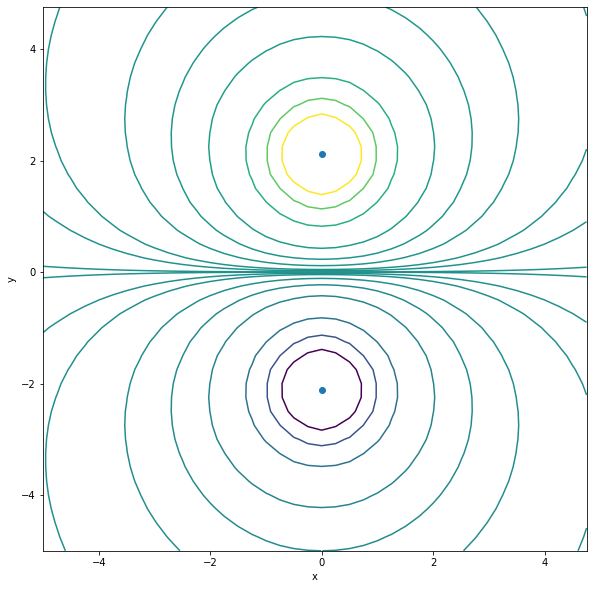

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Electric field

class electric_field():
        
    def __init__(self,N,delta,nsteps):
        self.N = N              #number of charges    
        self.x1 = np.zeros(N)   #coordinates of current segments
        self.y1 = np.zeros(N)
        self.q = np.ones(N)
        self.delta = delta
        self.nsteps = nsteps

def configure_charges(e):
    e.q[0] = 1.0
    e.q[1] = -1.0
    e.y1[0] = 2.111
    e.x1[0] = 0.0
    e.y1[1] = -2.111
    e.x1[1] = 0.0
        
def get_E(e,r):              #r = coordinates of point in question
    E = np.zeros(2)
    for i in range(2):
        x2 = r[0] - e.x1[i]  #components of vector from current source to point in question
        y2 = r[1] - e.y1[i]
        r2 = np.sqrt(x2**2 + y2**2)
        E0 = e.q[i]/(r2**3)
        E[0] += E0*x2
        E[1] += E0*y2
    return E

def plot_E_field(e,px,py):  
    ax.plot(px,py,color='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    
def plot_potential(e):
    x = np.arange(-5, 5, 0.25)
    y = np.arange(-5, 5, 0.25)
    xx, yy = np.meshgrid(x, y, sparse=True)
    x1 = e.x1[0]  #location of charge 1
    y1 = e.y1[0]
    r12 = (xx - x1)**2 + (yy - y1)**2
    Vofr = e.q[0]/r12
    x1 = e.x1[1]  #location of charge 1
    y1 = e.y1[1]
    r12 = (xx - x1)**2 + (yy - y1)**2
    Vofr += e.q[1]/r12
    lev = np.array([1e-3,1e-2,1/50,1/20.,1/10.,1/5.,1/2.,1.0,2.0])
    lev = np.append(-np.flip(lev),lev)
    ax.contour(x,y,Vofr,lev)
    
def trace_E(e,r):
    px = []
    py = []
    px.append(r[0])
    py.append(r[1])
    for _ in range(e.nsteps):
        E = get_E(e,r)
        Emag = np.sqrt(np.dot(E,E))
        r += e.delta*E/Emag
        px.append(r[0])
        py.append(r[1])
    plot_E_field(e,px,py)
    
#--------------------------------------------------------------------
    
N = 2
delta = 0.01
nsteps = 1000

e = electric_field(N,delta,nsteps)
configure_charges(e)

fig = plt.figure()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.plot(e.x1,e.y1,'o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')
plot_potential(e)


## Laplace's equation


- In a region free of charges, $\boldsymbol{\nabla} \cdot {\rm \bf E} =
  \rho/\epsilon_0 =  0$.  **Laplace's equation** is
\begin{equation*}
\boldsymbol{\nabla} \cdot [-\boldsymbol{\nabla} V({\rm \bf r})] = 0 \implies \nabla^2 V({\rm \bf r}) = 0
\end{equation*}
- In Cartesian coordinates
\begin{equation*}
\nabla^2 V(x,y,z) = \frac{\partial^2 V}{\partial x^2}+\frac{\partial^2
  V}{\partial y^2} +\frac{\partial^2 V}{\partial z^2}=0
\end{equation*}
-  In two dimensions
\begin{equation*}
\frac{1}{\Delta x^2}(V_{i+1,j} - 2 V_{i,j} + V_{i-1,j}) +
\frac{1}{\Delta y^2}(V_{i,j+1} - 2 V_{i,j} + V_{i,j-1}) = 0
\end{equation*}
- If we define a regular grid so that $\Delta x = \Delta y$, then
\begin{equation*}
V(x,y) \approx \frac{1}{4} (V_{i+1,j} + V_{i-1,j} +V_{i,j+1} + V_{i,j-1})
\end{equation*}
- That is, $V(x,y)$ is the average of the neighboring cells to the
  right, left, up, and down.

## Exercise 2: 

1. Write program to solve Laplace's equation in two dimensions with $0 < x < L$ and $0 < y < L$.  Let $V(x=0,y) = 10.0$ and all other boundaries set to the potential to zero, i.e., $V(x=L,y) = V(x,y=0) = V(x,y=L) = 0$.  It might be helpful to define the boundary conditions in *buffer* cells so the actual domain has indices $1 < i < N-2$ and $1 < j < N-2$. Let $\Delta x = \Delta y = L/N$ and set the initial potential in the domain to zero.

2. How many iterations are required to reach equilibrium?

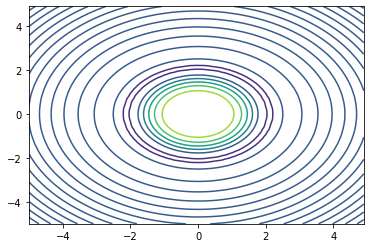

<Figure size 432x288 with 0 Axes>

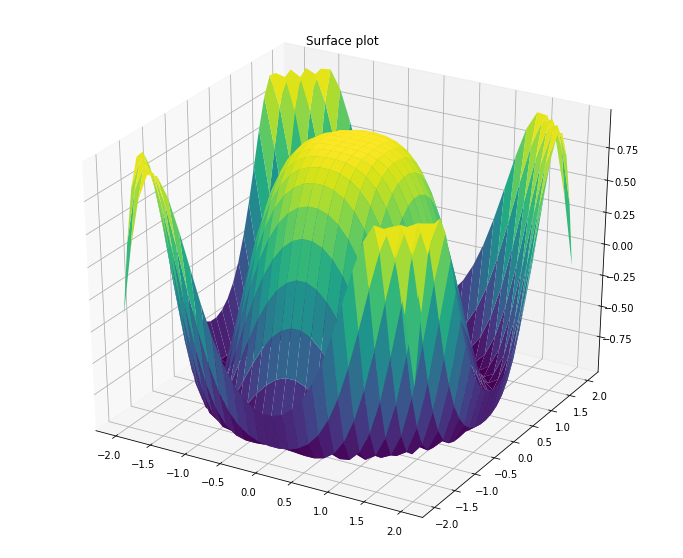

In [3]:
# The following sample code produces x and y arrays on a square grid and plots contours and surfaces...
# Just for your reference!

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
h = plt.contour(x,y,z)
plt.show()

x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T # transpose
z = np.cos(x ** 2 + y ** 2)
fig = plt.figure()
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

## Magnetic fields


- For static current systems, the magnetic field is given by the
*Biot-Savart* law
\begin{equation*}
\Delta {\rm \bf B}({\rm \bf r}) = \frac{\mu_0 I }{4 \pi} \left (\frac{\Delta
  {\rm \bf L} \times {\rm \bf r}^\prime}{r^{\prime 3}} \right)
\end{equation*}
where $\Delta {\rm \bf B}({\rm \bf r})$ is the magnetic field at point
${\rm \bf r}$ due to a segment of wire $\Delta {\rm \bf L}$ which carries a
current $I$ and ${\rm \bf r}^\prime$ is the vector from the $j$th wire segment
to ${\rm \bf r}$, i.e., ${\rm \bf r}^\prime = {\rm \bf r} - {\rm \bf r}_j$.
- Of course there are no isolated currents and a wire must be
  either a closed loop or sufficiently long that the contributions
  from the end points are negligible. 
- We can approximate a continuous wire by a series of discrete
  segments.  For the $j$th segment, the magnetic field at ${\rm \bf r}$ is
\begin{eqnarray*}
\Delta B_x({\rm \bf r}) &=& (\mu_0 I/4 \pi)[\Delta L_y(z-z_j) - \Delta
  L_z(y-y_j)]/|{\rm \bf r} - {\rm \bf r}_j|^3\\
\Delta B_y({\rm \bf r}) &=& (\mu_0 I/4 \pi)[\Delta L_z(x-x_j) - \Delta
  L_x(z-z_j)]/|{\rm \bf r} - {\rm \bf r}_j|^3\\
\Delta B_z({\rm \bf r}) &=& (\mu_0 I/4 \pi)[\Delta L_x(y-y_j) - \Delta
  L_y(x-x_j)]/|{\rm \bf r} - {\rm \bf r}_j|^3
\end{eqnarray*}
where $|{\rm \bf r} - {\rm \bf r}_j|^3 = [(x - x_j)^2 + (y - y_j)^2 + (z - z_j)^2]^{3/2}$

## Exercise 3:

1. Examine and comment the code below.  
2. Plot a single field line starting at $r = [1.5,0,0]$.  Adjust the tracing parameters, N, delta and nsteps, until you are satisfied with the result.  Explain each parameter.
3. Plot a collection of field lines to illustrate the overall topology of the magnetic field.
4. Does the magnitude of the current affect the result?  Explain.


<Figure size 432x288 with 0 Axes>

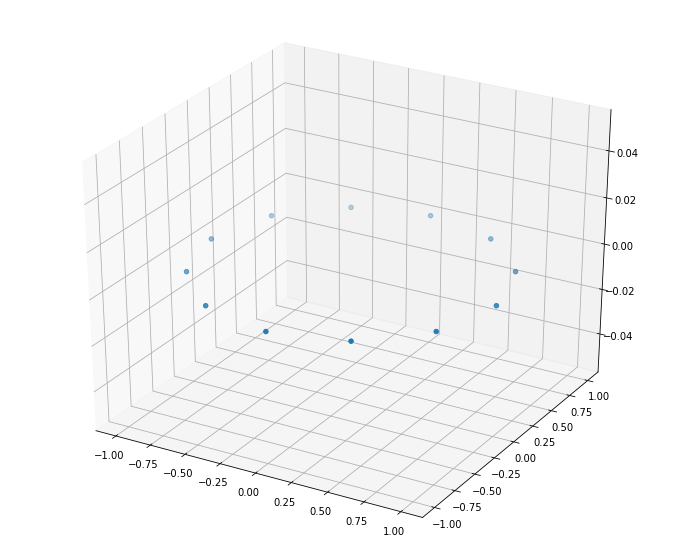

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class magnetic_field:  #bucket for related variables...in other languages, this is a data structure.
    
    def __init__(self,N,radius,I,delta,nsteps):
        self.N = N
        self.radius = radius
        self.I = I
        self.dLx = np.zeros(N)
        self.dLy = np.zeros(N)
        self.dLz = np.zeros(N)
        self.x1 = np.zeros(N)           #coordinates of current segments
        self.y1 = np.zeros(N)
        self.z1 = np.zeros(N)
        self.delta = delta
        self.nsteps = nsteps
        
def wire(b):
    dtheta = 2*np.pi/b.N
    dL = 2*np.pi*b.radius/b.N
    theta = np.arange(0,2*np.pi,dtheta)
    b.x1 = b.radius*np.cos(theta)       #coordinates of wire segment
    b.z1 = np.zeros(b.N)
    b.y1 = b.radius*np.sin(theta)
    b.dLx = -dL*np.sin(theta)
    b.dLz = np.zeros(b.N)
    b.dLy = dL*np.cos(theta)    
    return

#def plot_wire(b):
#    plt.plot(b.x1,b.z1,'o')
#    plt.show()

def get_B(b,r):              #r = coordinates of point in question
    mu0 = np.pi*4e-7
    B = np.zeros(3)
    for i in range(b.N):
        x2 = r[0] - b.x1[i]  #components of vector from current source to point in question
        y2 = r[1] - b.y1[i]
        z2 = r[2] - b.z1[i]
        r2 = np.sqrt(x2**2 + y2**2 + z2**2)
        B0 = mu0*b.I/(4*np.pi*r2**3)
        B[0] += B0*(b.dLy[i]*z2 - b.dLz[i]*y2)
        B[1] += B0*(b.dLz[i]*x2 - b.dLx[i]*z2)
        B[2] += B0*(b.dLx[i]*y2 - b.dLy[i]*x2) 
    return B

def plot_B_field(b,px,py,pz):    
    ax.scatter(px,py,pz,s=1,color='orange')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_zlim(-1.5,1.5)
    plt.savefig('bfield.png')
    
def trace(b,r):
    px = []
    py = []
    pz = []
    px.append(r[0])
    py.append(r[1])
    pz.append(r[2])
    for _ in range(b.nsteps):
        B = get_B(b,r)
        Bmag = np.sqrt(np.dot(B,B))
        r += b.delta*B/Bmag
        px.append(r[0])
        py.append(r[1])
        pz.append(r[2])
    plot_B_field(b,px,py,pz)
    
#---------------------------------------------------------------------
N = 12
radius = 1.0
I = 1.0 #amp
delta = 0.01
nsteps = 500

b = magnetic_field(N,radius,I,delta,nsteps)
wire(b)
fig = plt.figure()
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(b.x1,b.y1,b.z1)